<a href="https://colab.research.google.com/github/waassiim/CNN-with-TensorFlow/blob/main/CNN_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import glob
import scipy.misc
import os
import shutil
import matplotlib.pyplot as plt
from PIL import Image
from shutil import copyfile
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/compitition_data/train_ids_labels.csv")
validation=pd.read_csv("/content/drive/MyDrive/compitition_data/test_ids_only.csv")


In [ ]:
print(data.head())
data.shape

          Image_ID  Label
0  cVOfkSdqnWXUerr      0
1  EhnvIDPXFFjUhkR      0
2  tYKqoStvHsryFhS      1
3  eSpjlsZIwOMLmUS      1
4  uzxhIXjNENLyHwZ      1


(4026, 2)

array([[<Axes: title={'center': 'Label'}>]], dtype=object)

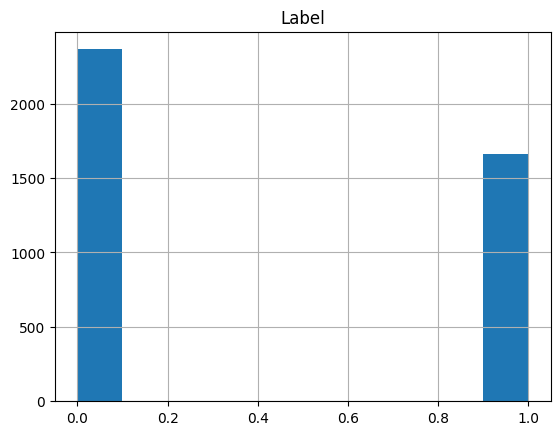

In [ ]:
data.hist(column="Label")

In [ ]:
x=data["Image_ID"].values
y=data["Label"].values

In [ ]:
!cd /content/drive/MyDrive/data_nchalah_titsab

In [ ]:
root_dir="/content/data"
# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)
else:
  os.mkdir(root_dir)
# GRADED FUNCTION: create_train_test_dirs
def create_train_test_dirs(root_path):
  ### START CODE HERE

  # HINT:
  # Use os.makedirs to create your directories with intermediate subdirectories
  # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

  path_training = os.path.join(root_dir, "training")
  path_testing=os.path.join(root_dir, "testing")

  # HINT:
  os.makedirs(path_training)
  os.makedirs(path_testing)
  os.makedirs(os.path.join(path_training,"have_holes"))
  os.makedirs(os.path.join(path_training,"doesnt_have_holes"))
  os.makedirs(os.path.join(path_testing,"have_holes"))
  os.makedirs(os.path.join(path_testing,"doesnt_have_holes"))

  ### END CODE HERE


try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
have_holes_dr="/content/data/have_holes"
doesnt_have_holes_dr="/content/data/doesnt_have_holes"
if os.path.exists(have_holes_dr):
  shutil.rmtree(have_holes_dr)
else:
  os.mkdir(have_holes_dr)
if os.path.exists(doesnt_have_holes_dr):
  shutil.rmtree(doesnt_have_holes_dr)
else:
  os.mkdir(doesnt_have_holes_dr)

In [ ]:
# Test your create_train_test_dirs function

for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/data/testing
/content/data/doesnt_have_holes
/content/data/have_holes
/content/data/training
/content/data/testing/doesnt_have_holes
/content/data/testing/have_holes
/content/data/training/doesnt_have_holes
/content/data/training/have_holes


In [ ]:
import imghdr

In [ ]:
source="/content/drive/MyDrive/data_nchalah_titsab"
destination=root_dir
def split_source_data(source,destination,data,label):
  l=os.listdir(source)
  image_exts = ['jpeg','jpg', 'bmp', 'png']
  i=-1
  for img in list(data) :
    i=i+1
    image_path=os.path.join(source,img+".JPG")
    print(img)
    if os.path.getsize(image_path)==0:
      print( img+" is zero length, so ignoring.")
      os.remove(image_path)
    else:
        if label[i]==1:
          copyfile(os.path.join(source,img+".JPG") , os.path.join(os.path.join(destination,"have_holes"),img+".jpg"))
        else:
          copyfile(os.path.join(source,img+".JPG") , os.path.join(os.path.join(destination,"doesnt_have_holes"),img+".jpg"))



In [ ]:
split_source_data(source,destination,x,y)

cVOfkSdqnWXUerr
EhnvIDPXFFjUhkR
tYKqoStvHsryFhS
eSpjlsZIwOMLmUS
uzxhIXjNENLyHwZ
hezYtxLhHStWATz
LcZuJysTXaSNBDe
RiWvALRpGwyReTK
kYQZTGpDvwXUZlu
VxXuRhwhHDvGWty
PVseTpBvTnqLDmk
FYshteAhtFDNsRp
gXTcncVAclMwbgO
EgbUBlfMujzEgNp
YlkqqPNsItojlbd
QSCIuzoPpaNAIJG
XcAfqmUulhlZSxb
dnWYyhuFKHvYLUP
ZbLhYIeGqrbjDsV
IRBwPwewbNqtmXJ
TtGADjTPcKRlGVx
aKiTqUaIwbfJgbj
GujejjcyPKhQeHr
bvrTzHpEopyOIqF
oUhcmNwKUPIlqPq
byLICfGenNZXXns
gmxqKOIXyTandEv
ZUmMzvEtCiEsZSv
qsaQkuDGROkiVzQ
PjtQkPLPyHGKImi
WlPSfKzgxDLiGzH
tIvhHpWkeAssHiK
bGXMaKypDRQEsiy
DpXXLZgIJdMPcdB
wTqibnxvEssJOul
qTgzOwHzsKxgNJQ
aGNsMQHylHTvxyU
VTmBKTBZgiYbbpY
mcLcRsNmKRDmzgq
toaFVqgiOilTeED
zaPmCwWjVxCZCwE
aRNCQqxJnicZYUM
szExoYRfsBmIPbw
uOwqleRPxcNRKBT
LlzeQXsYnhgAYRG
meGlerzXUnGHfuY
iTtyVAPfaMmSvkp
pxwMhqOlAmXpePO
noijddTUHckCVzl
ttHBDKFmtyHMxYR
vQoJhivnDNLOQEF
EhxBXNpIbHGhcKw
MUmaXvnpzvNvwfP
ndJbsOThuKwfYmu
zqpbcNlVCMjoNUv
tNCHWKAnDnzfgIz
RBlFHobJOQLhgJd
pcDrmgAGuGClzFX
nqZlNMSOxdEVJbW
KWczuLTyQaFItxE
KJuhKWIpgTDOEFo
pjaqUoDMZCPUSnc
XOhhOiXZ

In [ ]:
print(f"\n\nThere are {len(os.listdir(have_holes_dr))} images of holes")
print(f"\n\nThere are {len(os.listdir(doesnt_have_holes_dr))} images without of holes")



There are 1661 images of holes


There are 2365 images without of holes


In [ ]:
# GRADED FUNCTION: split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

  ### START CODE HERE
   l=os.listdir(SOURCE)
   l=random.sample(l , len(l))
   l=random.sample(l,len(l))
   s=0
   k=0

   t=int(SPLIT_SIZE*(len(l)-k))
   for img in l:
      image_path=os.path.join(SOURCE,img)
      image_exts = ['jpeg','jpg', 'bmp', 'png']
      tip = imghdr.what(image_path)
      if tip.lower() not in image_exts:
          print('Image not in ext list {}'.format(image_path))
          os.remove(image_path)
      else:
       s=s+1
       if s<=t:
         copyfile( os.path.join( SOURCE,img) , os.path.join(TRAINING,img))
       else :
         copyfile( os.path.join( SOURCE,img), os.path.join(TESTING,img))

In [ ]:


TRAINING_DIR = "/content/data/training"
TESTING_DIR = "/content/data/testing"

TRAINING_have_holes_dr= os.path.join(TRAINING_DIR, "have_holes")
TESTING_doesnt_have_holes_dr = os.path.join(TESTING_DIR, "doesnt_have_holes")

TRAINING_doesnt_have_holes_dr = os.path.join(TRAINING_DIR, "doesnt_have_holes")
TESTING_have_holes_dr = os.path.join(TESTING_DIR, "have_holes")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_have_holes_dr)) > 0:
  for file in os.scandir(TRAINING_have_holes_dr):
    os.remove(file.path)
if len(os.listdir(TRAINING_doesnt_have_holes_dr)) > 0:
  for file in os.scandir(TRAINING_doesnt_have_holes_dr):
    os.remove(file.path)
if len(os.listdir(TESTING_doesnt_have_holes_dr)) > 0:
  for file in os.scandir(TESTING_doesnt_have_holes_dr):
    os.remove(file.path)
if len(os.listdir(TESTING_have_holes_dr)) > 0:
  for file in os.scandir(TESTING_have_holes_dr):
    os.remove(file.path)
split_size = 0.85

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(have_holes_dr, TRAINING_have_holes_dr, TESTING_have_holes_dr, split_size)
split_data(doesnt_have_holes_dr, TRAINING_doesnt_have_holes_dr, TESTING_doesnt_have_holes_dr, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_have_holes_dr))} images of TRAINING_have_holes_dr")
print(f"There are {len(os.listdir(TRAINING_doesnt_have_holes_dr))} images of TRAINING_doesnt_have_holes_dr")
print(f"There are {len(os.listdir(TESTING_doesnt_have_holes_dr))} images of TESTING_doesnt_have_holes_dr")
print(f"There are {len(os.listdir(TESTING_have_holes_dr))} images of TESTING_have_holes_dr")



There are 1411 images of TRAINING_have_holes_dr
There are 2010 images of TRAINING_doesnt_have_holes_dr
There are 355 images of TESTING_doesnt_have_holes_dr
There are 250 images of TESTING_have_holes_dr


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
TRAINING_DIR = "/content/data/training"
TESTING_DIR = "/content/data/testing"


In [ ]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255,
                                     rotation_range=30,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='binary',
                                                      target_size=(150,150),
                                                      color_mode='grayscale' )

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                target_size=(150,150),
                                                                color_mode='grayscale')
  ### END CODE HERE
  return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 3421 images belonging to 2 classes.
Found 605 images belonging to 2 classes.


In [ ]:
import tensorflow as tf

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras


In [ ]:
batch_size = 32
epochs = 100
# dimensions des images
img_rows, img_cols = 150, 150
input_shape = (img_rows, img_cols, 3)

In [ ]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test,indices_train,indices_test = train_test_split(images, Y,indices, test_size=0.3, random_state=1)

NameError: ignored

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# ModelCheckpoint to save model in case of interrupting the learning process
checkpoint = ModelCheckpoint("./model_hole_in_the_street.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only=True,
                             verbose=1)

# EarlyStopping to find best model with a large number of epochs
earlystop = EarlyStopping(monitor='val_loss',
                          restore_best_weights=True,
                          patience=5,  # number of epochs with no improvement after which training will be stopped
                          verbose=1)

callbacks = [earlystop, checkpoint]

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150*150 with 3 bytes color
    # This is the first convolution
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150,150,1)),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(256, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    keras.layers.Flatten(),
    # 1024 neuron hidden layer
    keras.layers.Dense(1024, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])




In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 256)      

In [ ]:
history=model.fit(train_generator,
          batch_size=32,
          epochs=50,
          verbose=1,
          callbacks=callbacks,
          validation_data=validation_generator)

Epoch 1/50
107/107 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.5960
Epoch 1: val_loss improved from inf to 0.60166, saving model to ./model_hole_in_the_street.h5
107/107 [==============================] - 36s 299ms/step - loss: 0.6822 - accuracy: 0.5960 - val_loss: 0.6017 - val_accuracy: 0.6165
Epoch 2/50
107/107 [==============================] - ETA: 0s - loss: 0.6316 - accuracy: 0.6378
Epoch 2: val_loss did not improve from 0.60166
107/107 [==============================] - 23s 219ms/step - loss: 0.6316 - accuracy: 0.6378 - val_loss: 0.6296 - val_accuracy: 0.6050
Epoch 3/50
107/107 [==============================] - ETA: 0s - loss: 0.6160 - accuracy: 0.6609
Epoch 3: val_loss improved from 0.60166 to 0.60079, saving model to ./model_hole_in_the_street.h5
107/107 [==============================] - 30s 281ms/step - loss: 0.6160 - accuracy: 0.6609 - val_loss: 0.6008 - val_accuracy: 0.6711
Epoch 4/50
107/107 [==============================] - ETA: 0s - loss: 0

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       36992     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 256)      

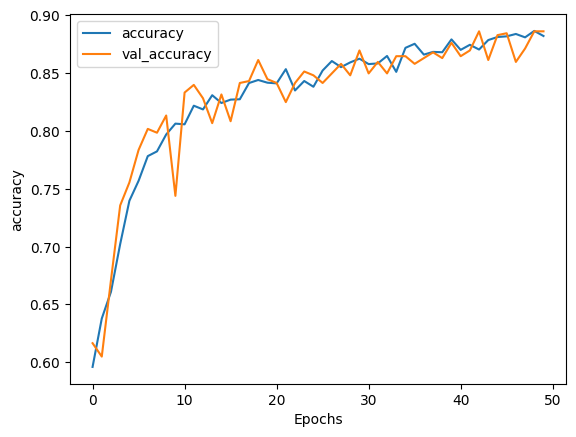

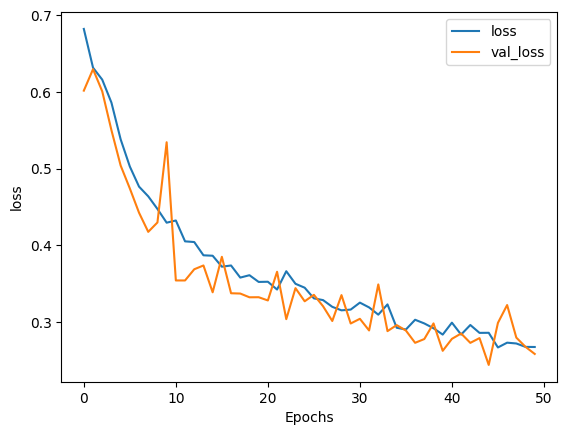

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plot the accuracy and results
plot_graphs(history,"accuracy")
plot_graphs(history,"loss")

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  index = model.predict(images, batch_size=10)
  print(index)